In [10]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Sample products
products = ['WidgetA', 'WidgetB', 'WidgetC', 'WidgetD']

# Generate 100 sales records
data = []
start_date = datetime(2025, 1, 1)

for i in range(100):
    date = start_date + timedelta(days=random.randint(0, 180))
    product = random.choice(products)
    quantity = random.randint(1, 20)
    price = round(random.uniform(10.0, 50.0), 2)
    
    data.append([date.strftime('%Y-%m-%d'), product, quantity, price])

# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Product', 'Quantity', 'Price'])

# Save to CSV
df.to_csv('sales.csv', index=False)

print("✅ sales.csv file created with 100 sales records.")


✅ sales.csv file created with 100 sales records.


In [12]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('sales.csv')

# Display the first 5 rows
print(df.head())


         Date  Product  Quantity  Price
0  2025-03-10  WidgetD         2  10.91
1  2025-04-21  WidgetB         7  26.19
2  2025-01-22  WidgetB        12  19.30
3  2025-02-03  WidgetC         8  17.52
4  2025-01-29  WidgetD         1  23.98


In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales.csv')

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the result
print(missing_values)


Date        0
Product     0
Quantity    0
Price       0
dtype: int64


In [16]:
import pandas as pd
import random

# Load the CSV file
df = pd.read_csv('sales.csv')

# Add a "Region" column (e.g., North, South, East, West)
regions = ['North', 'South', 'East', 'West']
df['Region'] = [random.choice(regions) for _ in range(len(df))]

# Add a "Sales" column: Quantity × Price
df['Sales'] = df['Quantity'] * df['Price']

# Group by Region and calculate average sales
avg_sales_by_region = df.groupby('Region')['Sales'].mean()

# Display the result
print(avg_sales_by_region)


Region
East     251.761667
North    293.234333
South    279.711429
West     354.203600
Name: Sales, dtype: float64


In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales.csv')

# If 'Sales' and 'Region' columns were previously added, re-add them (optional)
df['Region'] = [random.choice(['North', 'South', 'East', 'West']) for _ in range(len(df))]
df['Sales'] = df['Quantity'] * df['Price']

# Assume a fixed cost per unit
cost_per_unit = 15.0
df['Cost'] = df['Quantity'] * cost_per_unit

# Calculate Profit = Revenue - Cost
df['Profit'] = df['Sales'] - df['Cost']

# Display first 5 rows to verify
print(df[['Date', 'Product', 'Quantity', 'Price', 'Sales', 'Cost', 'Profit']].head())


         Date  Product  Quantity  Price   Sales   Cost  Profit
0  2025-03-10  WidgetD         2  10.91   21.82   30.0   -8.18
1  2025-04-21  WidgetB         7  26.19  183.33  105.0   78.33
2  2025-01-22  WidgetB        12  19.30  231.60  180.0   51.60
3  2025-02-03  WidgetC         8  17.52  140.16  120.0   20.16
4  2025-01-29  WidgetD         1  23.98   23.98   15.0    8.98


In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales.csv')

# Recalculate Sales (Revenue), in case it's not present
df['Sales'] = df['Quantity'] * df['Price']

# Sort by Sales (Revenue) in descending order
df_sorted = df.sort_values(by='Sales', ascending=False)

# Display the top 5 rows with highest revenue
print(df_sorted.head())


          Date  Product  Quantity  Price   Sales
39  2025-05-30  WidgetB        20  45.05  901.00
31  2025-04-28  WidgetA        18  48.87  879.66
50  2025-05-22  WidgetD        19  45.55  865.45
67  2025-05-30  WidgetA        17  48.65  827.05
47  2025-06-21  WidgetA        16  48.92  782.72


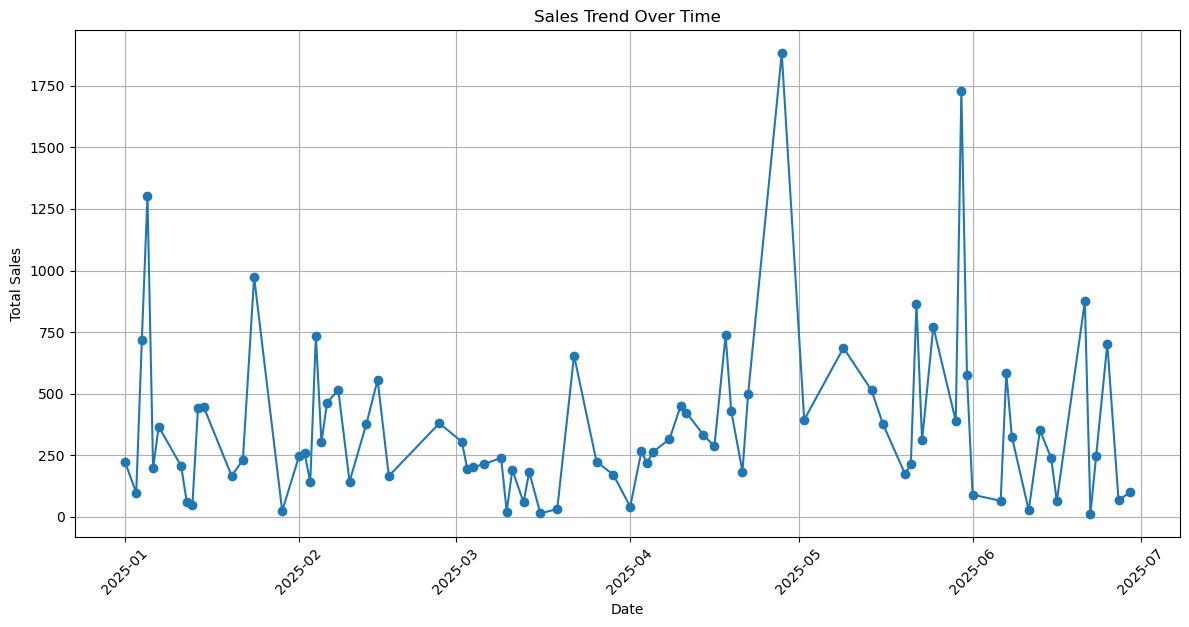

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('sales.csv')

# Ensure Sales column is present
df['Sales'] = df['Quantity'] * df['Price']

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date to ensure the trend line is accurate
df = df.sort_values('Date')

# Group sales by date (in case there are multiple sales per day)
daily_sales = df.groupby('Date')['Sales'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
